<a href="https://colab.research.google.com/github/ppotatoo/Capstone-Predictive-Modeling-for-Increasing-Adoption-Probability/blob/master/logistic_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import statsmodels.api as sm
import pathlib

In [7]:
plt.rc('font', family='NanumGothic') 

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
df = pd.read_csv('/content/drive/MyDrive/캡스톤2_제주유기견/설문결과-Raw-Data.csv',sep=',')

In [10]:
df.columns = ['인식매체','경험','인식','관심도','지식','구성원동의','환경','비용지불의사','정부지원정책','犬성별','중성화','나이','털길이','품종','색상','크기','성격','공고기간','입양희망여부','d1','d2','조사 나이대','성별','d5','d6']
df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,크기,성격,공고기간,입양희망여부,d1,d2,조사 나이대,성별,d5,d6
0,1,1,2,3,4,2,2,5,4,2,...,3,2,4,1,4,1,61,1,3,NaN
1,1,1,4,5,4,4,5,4,4,1,...,4,4,4,2,1,2,26,1,3,NaN
2,1,1,2,4,4,2,2,4,4,1,...,3,2,3,2,3,1,46,1,3,NaN
3,1,2,3,2,2,3,2,2,2,2,...,3,4,4,3,3,1,53,2,6,NaN
4,1,2,3,2,2,3,3,4,4,2,...,3,3,3,2,2,1,41,2,2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1,2,3,2,3,3,2,2,4,2,...,3,3,3,2,3,1,30,2,3,NaN
296,1,1,5,5,3,4,4,4,4,2,...,3,3,3,3,3,2,67,2,4,NaN
297,1,1,3,4,4,4,3,4,4,1,...,2,3,3,3,1,3,45,1,3,NaN
298,1,1,2,3,1,2,3,2,1,2,...,1,1,1,3,2,2,43,1,3,NaN


In [11]:
real_df = df.drop(['d1','d2','d5','d6'], axis = 1) # 라이프 스타일, 직업 삭제
real_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   인식매체    300 non-null    int64
 1   경험      300 non-null    int64
 2   인식      300 non-null    int64
 3   관심도     300 non-null    int64
 4   지식      300 non-null    int64
 5   구성원동의   300 non-null    int64
 6   환경      300 non-null    int64
 7   비용지불의사  300 non-null    int64
 8   정부지원정책  300 non-null    int64
 9   犬성별     300 non-null    int64
 10  중성화     300 non-null    int64
 11  나이      300 non-null    int64
 12  털길이     300 non-null    int64
 13  품종      300 non-null    int64
 14  색상      300 non-null    int64
 15  크기      300 non-null    int64
 16  성격      300 non-null    int64
 17  공고기간    300 non-null    int64
 18  입양희망여부  300 non-null    int64
 19  조사 나이대  300 non-null    int64
 20  성별      300 non-null    int64
dtypes: int64(21)
memory usage: 49.3 KB


In [12]:
idx = real_df[real_df["입양희망여부"] == 3].index     #  인덱스의 값이 저장됨
real_df.drop(idx , inplace=True) # 해당 인덱스를 제거함

In [13]:
old_range = {'입양희망여부' : {2:0}, '성별' : {2:0}} # 0 입양안한다, 1 한다,    성별 - 0 = 여자, 1 = 남자
logi_df = real_df.replace(old_range)
logi_df

,인식매체,경험,인식,관심도,지식,구성원동의,환경,비용지불의사,정부지원정책,犬성별,...,나이,털길이,품종,색상,크기,성격,공고기간,입양희망여부,조사 나이대,성별
0,1,1,2,3,4,2,2,5,4,2,...,4,4,4,4,3,2,4,1,61,1
1,1,1,4,5,4,4,5,4,4,1,...,4,3,4,3,4,4,4,0,26,1
2,1,1,2,4,4,2,2,4,4,1,...,3,3,4,3,3,2,3,0,46,1
4,1,2,3,2,2,3,3,4,4,2,...,3,3,4,4,3,3,3,0,41,0
5,1,1,4,5,4,5,3,5,4,1,...,3,2,4,4,2,3,5,1,29,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,1,1,3,4,4,4,4,5,5,1,...,4,3,4,3,4,3,4,1,52,1
291,1,2,2,3,3,2,2,2,4,1,...,3,3,3,3,3,2,3,0,26,0
292,1,1,2,3,3,4,4,3,3,1,...,4,4,5,5,4,3,4,1,33,1
295,1,2,3,2,3,3,2,2,4,2,...,3,3,4,4,3,3,3,0,30,0


# 로지스틱 회귀분석 (종속변수 = 입양희망여부)

In [14]:
logi_df.describe().T #입양 희망여부 평균 0.497 => 결과변수 균형잡힘

,count,mean,std,min,25%,50%,75%,max
인식매체,204.0,1.098039,0.298099,1.0,1.00,1.0,1.0,2.0
경험,204.0,1.279412,0.449814,1.0,1.00,1.0,2.0,2.0
인식,204.0,3.299020,0.964288,1.0,3.00,3.0,4.0,5.0
관심도,204.0,3.411765,1.126072,1.0,3.00,4.0,4.0,5.0
지식,204.0,3.117647,0.995498,1.0,2.00,3.0,4.0,5.0
구성원동의,204.0,3.181373,1.162402,1.0,2.00,3.0,4.0,5.0
환경,204.0,2.774510,1.152482,1.0,2.00,3.0,4.0,5.0
비용지불의사,204.0,3.147059,1.198497,1.0,2.00,3.0,4.0,5.0
정부지원정책,204.0,3.651961,1.069711,1.0,3.00,4.0,4.0,5.0
犬성별,204.0,1.524510,0.500627,1.0,1.00,2.0,2.0,2.0


In [15]:
logi_df.max()

인식매체       2
경험         2
인식         5
관심도        5
지식         5
구성원동의      5
환경         5
비용지불의사     5
정부지원정책     5
犬성별        2
중성화        5
나이         5
털길이        5
품종         5
색상         5
크기         5
성격         5
공고기간       5
입양희망여부     1
조사 나이대    68
성별         1
dtype: int64

In [16]:
logi_df["입양희망여부"].value_counts() # 0 입양x, 1 입양 o

1    102
0    102
Name: 입양희망여부, dtype: int64

In [17]:
# import matplotlib.font_manager as fm
# # 설치된 폰트 출력
# font_list = [font.name for font in fm.fontManager.ttflist]
# print(len(font_list))
# font_list

/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49885 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52404 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54744 missing from current font.
  font.set_

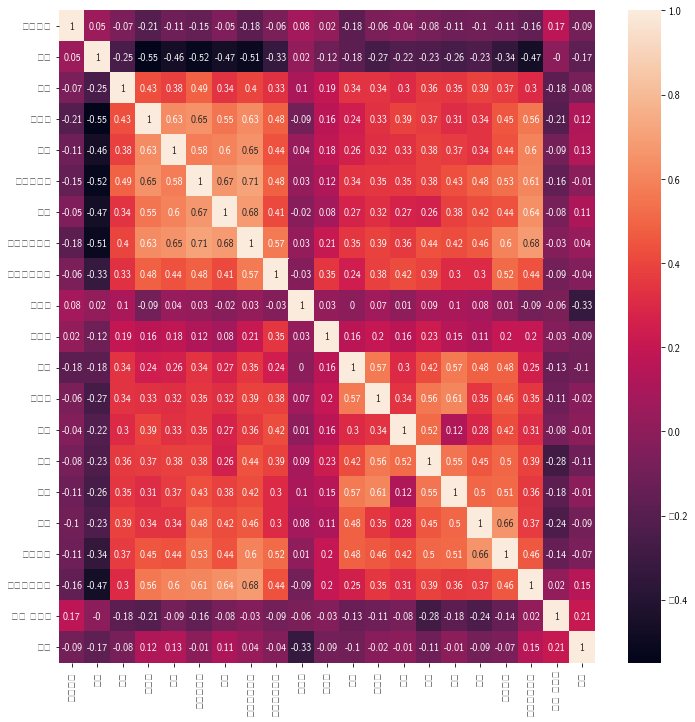

In [18]:
plt.rcParams['font.family'] = 'cmss10'
plt.figure(figsize=(12,12))
corr_=logi_df.corr().round(2)
sns.heatmap(corr_, annot=True)
plt.show()

In [19]:
x = logi_df.drop('입양희망여부', axis=1)  #변수 지정
y = logi_df['입양희망여부']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [32]:
print(len(x_train))
print(len(x_test))

142
62


In [20]:
log = LogisticRegression() #로지스틱 회귀분석 시행

log.fit(x_train, y_train) #모델의 정확도 확인
print('학습용 데이터셋 정확도 : %.2f' % log.score(x_train, y_train))
print('검증용 데이터셋 정확도 : %.2f' % log.score(x_test, y_test))

학습용 데이터셋 정확도 : 0.89
검증용 데이터셋 정확도 : 0.87


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
from sklearn.metrics import classification_report
y_pred=log.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.86      0.88        35
           1       0.83      0.89      0.86        27

    accuracy                           0.87        62
   macro avg       0.87      0.87      0.87        62
weighted avg       0.87      0.87      0.87        62



In [22]:
logit = sm.Logit(logi_df[['입양희망여부']],x) #로지스틱 회귀분석 시행
result = logit.fit()

Optimization terminated successfully.
         Current function value: 0.294044
         Iterations 8


In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 입양희망여부   No. Observations:                  204
Model:                          Logit   Df Residuals:                      184
Method:                           MLE   Df Model:                           19
Date:                Mon, 05 Dec 2022   Pseudo R-squ.:                  0.5758
Time:                        16:39:05   Log-Likelihood:                -59.985
converged:                       True   LL-Null:                       -141.40
Covariance Type:            nonrobust   LLR p-value:                 7.124e-25
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
인식매체          -3.1473      1.048     -3.004      0.003      -5.201      -1.094
경험            -2.0754      0.641     -3.237      0.001      -3.332      -0.819
인식            -0.2286      0.343     -0.667      0.505      -0.900       0.443
관심도           -0.2953      0.345     -0.856      0.392      -0.971       0.381
지식             0.6395      0.374      1.708      0.088      -0.094       1.374
구성원동의          0.5722      0.374      1.531      0.126      -0.160       1.305
환경             1.0247      0.322      3.187      0.001       0.394       1.655
비용지불의사         1.0476      0.369      2.839      0.005       0.324       1.771
정부지원정책        -0.1784      0.309     -0.578      0.563      -0.784       0.427
犬성별           -1.4563      0.526     -2.767      0.006      -2.488      -0.425
중성화           -0.0479      0.310     -0.155      0.877      -0.656       0.560
나이            -1.1364      0.429     -2.648      0.008      -1.977      -0.295
털길이            0.7898      0.428      1.845      0.065      -0.049       1.629
품종             0.0844      0.380      0.222      0.824      -0.660       0.828
색상             0.5983      0.394      1.517      0.129      -0.175       1.371
크기            -0.1919      0.373     -0.514      0.607      -0.923       0.539
성격            -0.0315      0.353     -0.089      0.929      -0.724       0.661
공고기간          -0.0349      0.411     -0.085      0.932      -0.841       0.772
조사 나이대         0.0098      0.024      0.405      0.685      -0.038       0.057
성별            -0.5698      0.564     -1.011      0.312      -1.674       0.535
==============================================================================
"""

In [24]:
np.exp(result.params) #오즈비가 1 기준으로 큰지 작은지 파악 1과 값이 수렴한다면 영향 x

인식매체      0.042969
경험        0.125501
인식        0.795623
관심도       0.744302
지식        1.895598
구성원동의     1.772196
환경        2.786169
비용지불의사    2.850686
정부지원정책    0.836586
犬성별       0.233101
중성화       0.953184
나이        0.320963
털길이       2.202918
품종        1.088015
색상        1.819068
크기        0.825405
성격        0.968966
공고기간      0.965699
조사 나이대    1.009865
성별        0.565663
dtype: float64